In [1]:
%matplotlib inline

/home/kyran/workspace/dotfiles/.virtualenvs/pyjsbook/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb

plt.rcParams['figure.figsize'] = 8, 4

In [3]:
df = pd.read_json(open('data/nobel_winners_cleaned.json'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null object
date_of_death     559 non-null object
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: int64(2), object(10)
memory usage: 87.1+ KB


In [5]:
# convert the date columns to a usable form
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null datetime64[ns]
date_of_death     559 non-null datetime64[ns]
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 87.1+ KB


In [7]:
by_gender = df.groupby('gender')

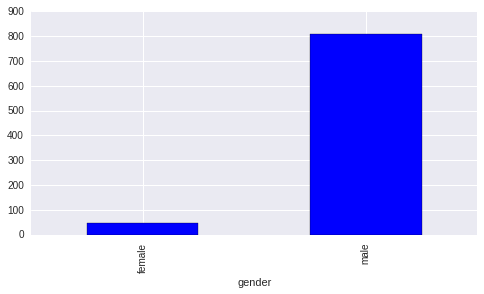

In [8]:
by_gender.size().plot(kind='bar')

In [9]:
by_gender.size()

gender
female     47
male      811
dtype: int64

In [10]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
267,Maria Goeppert-Mayer,1963
614,Marie Skłodowska-Curie,1903


In [11]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

/home/kyran/workspace/dotfiles/.virtualenvs/pyjsbook/local/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


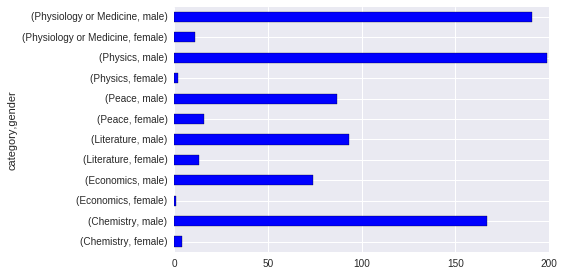

In [13]:
by_cat_gen.size().plot(kind='barh')

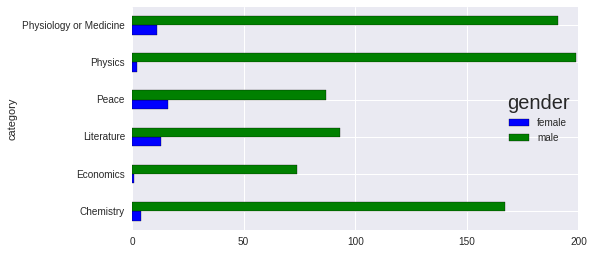

In [56]:
by_cat_gen.size().unstack().plot(kind='barh')

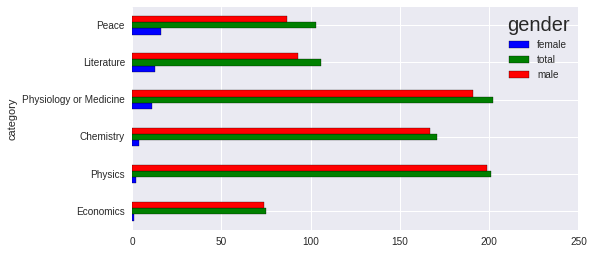

In [57]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

In [58]:
df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

                       name        country  year
268    Maria Goeppert-Mayer  United States  1963
610  Marie Skłodowska-Curie         Poland  1903

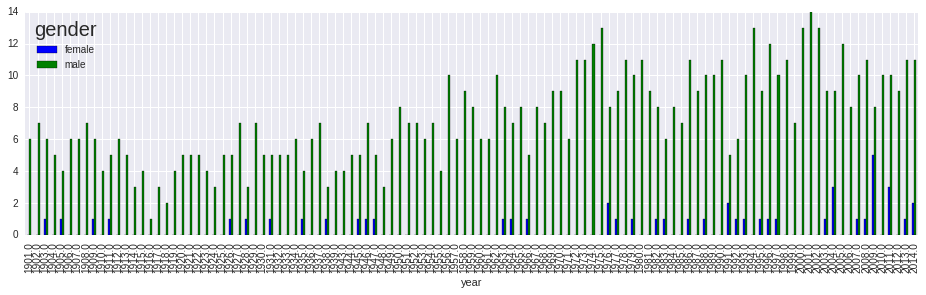

In [59]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

In [18]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [61]:
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender  female  male
year                
1901       NaN     6
1902       NaN     7
1903         1     6
1904       NaN     5
1905         1     4
1906       NaN     6
1907       NaN     6
1908       NaN     7
1909         1     6
1910       NaN     4
1911         1     5
1912       NaN     6
1913       NaN     5
1914       NaN     3
1915       NaN     4
1916       NaN     1
1917       NaN     3
1918       NaN     2
1919       NaN     4
1920       NaN     5
1921       NaN     5
1922       NaN     5
1923       NaN     4
1924       NaN     3
1925       NaN     5
1926         1     5
1927       NaN     7
1928         1     3
1929       NaN     7
1930       NaN     5
...        ...   ...
1985       NaN     7
1986         1    11
1987       NaN     9
1988         1    10
1989       NaN    10
1990       NaN    11
1991         2     5
1992         1     6
1993         1    10
1994       NaN    13
1995         1     9
1996         1    12
1997         1    10
1998       NaN    11
1999       Na

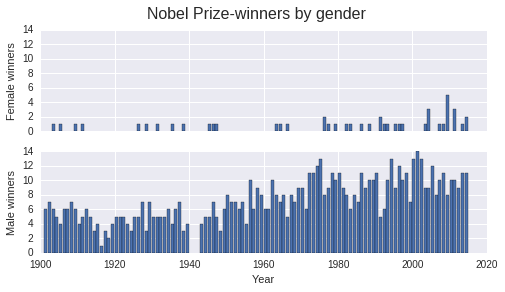

In [60]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

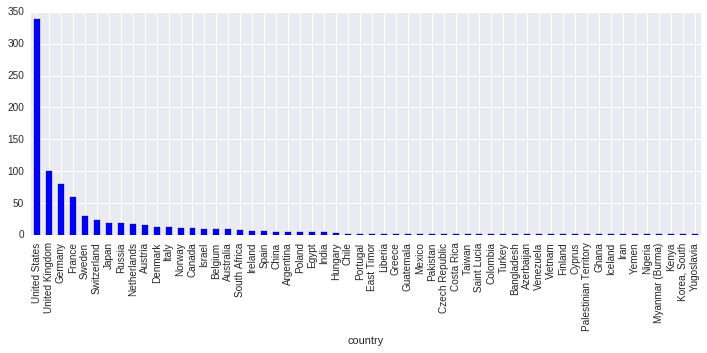

In [20]:
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))

In [62]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index([u'Argentina', u'Australia', u'Austria', u'Azerbaijan', u'Bangladesh',
       u'Belgium', u'Canada', u'Chile', u'China', u'Colombia', u'Costa Rica',
       u'Cyprus', u'Czech Republic', u'Denmark', u'East Timor', u'Egypt',
       u'Finland', u'France', u'Germany', u'Ghana', u'Greece', u'Guatemala',
       u'Hungary', u'Iceland', u'India', u'Iran', u'Ireland', u'Israel',
       u'Italy', u'Japan', u'Kenya', u'Korea, South', u'Liberia', u'Mexico',
       u'Myanmar (Burma)', u'Netherlands', u'Nigeria', u'Norway', u'Pakistan',
       u'Palestinian Territory', u'Poland', u'Portugal', u'Russia',
       u'Saint Lucia', u'South Africa', u'Spain', u'Sweden', u'Switzerland',
       u'Taiwan', u'Turkey', u'United Kingdom', u'United States', u'Vietnam',
       u'Yemen', u'Yugoslavia'],
      dtype='object', name=u'country')

In [63]:
df_countries = pd.read_json('data/winning_country_data.json', orient='index')

In [64]:
df_countries.ix[0]

alpha3Code               ARG
area              2.7804e+06
capital         Buenos Aires
gini                    44.5
latlng        [-34.0, -64.0]
name               Argentina
population          42669500
Name: Argentina, dtype: object

In [65]:
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] =\
df_countries.nobel_wins / df_countries.population

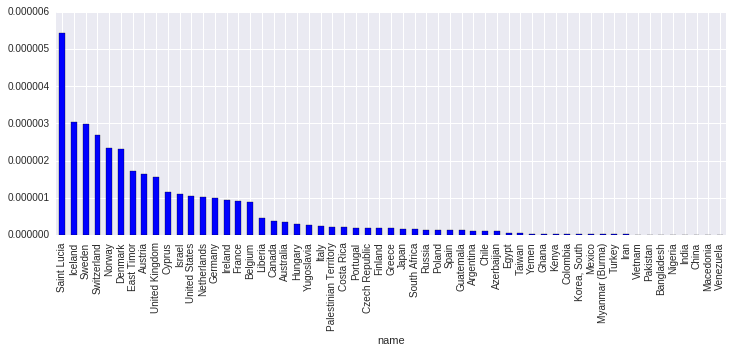

In [66]:
df_countries.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar', figsize=(12,4))

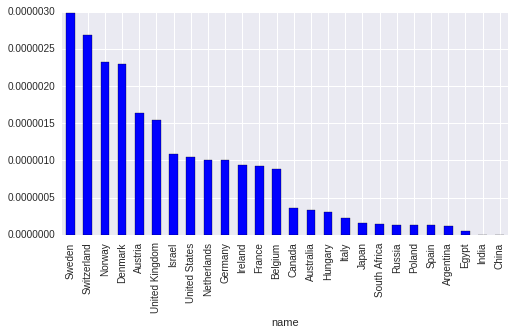

In [67]:
# filter for countries with more than two Nobel prizes
df_countries[df_countries.nobel_wins > 2]\
.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar')

In [27]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
nat_cat_sz[:5] # take the first five countries by category

category    Chemistry  Economics  Literature  Peace  Physics  \
country                                                        
Argentina           1        NaN         NaN      2      NaN   
Australia         NaN          1           1    NaN        1   
Austria             3          1           1      2        4   
Azerbaijan        NaN        NaN         NaN    NaN        1   
Bangladesh        NaN        NaN         NaN      1      NaN   

category    Physiology or Medicine  
country                             
Argentina                        2  
Australia                        6  
Austria                          4  
Azerbaijan                     NaN  
Bangladesh                     NaN  

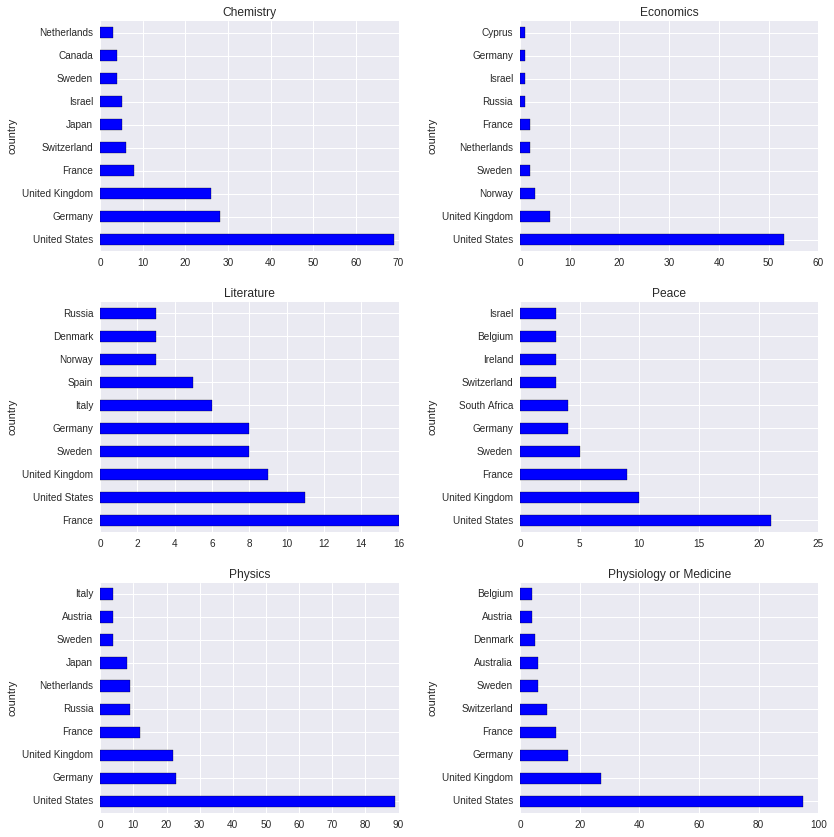

In [68]:
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
    ax = axes[i/COL_NUM, i%COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
plt.tight_layout()

In [29]:
# increase the font size 
plt.rcParams['font.size'] = 20

In [30]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index)

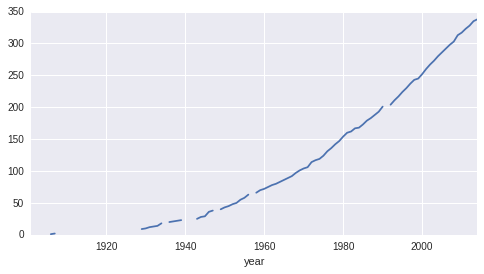

In [31]:
by_year_nat_sz['United States'].cumsum().plot()

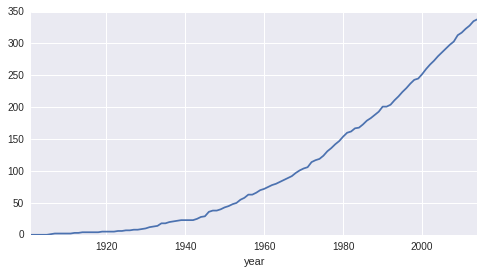

In [32]:
by_year_nat_sz['United States'].fillna(0).cumsum().plot()

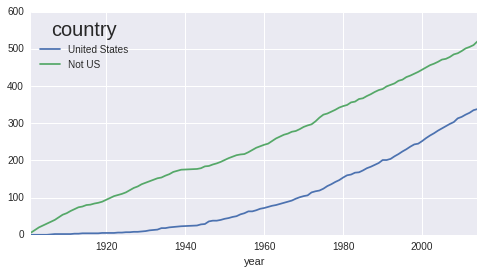

In [33]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')
by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[['United States', 'Not US']].cumsum().plot()

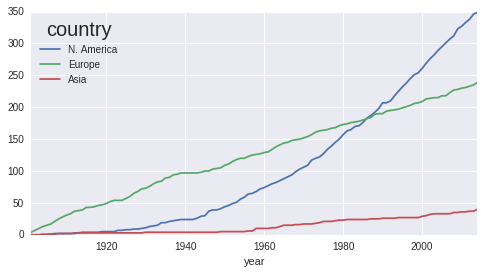

In [34]:
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index).fillna(0)

regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia', 'India']}
]

for region in regions:
    by_year_nat_sz[region['label']] =\
    by_year_nat_sz[region['countries']].sum(axis=1)
    
by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot()

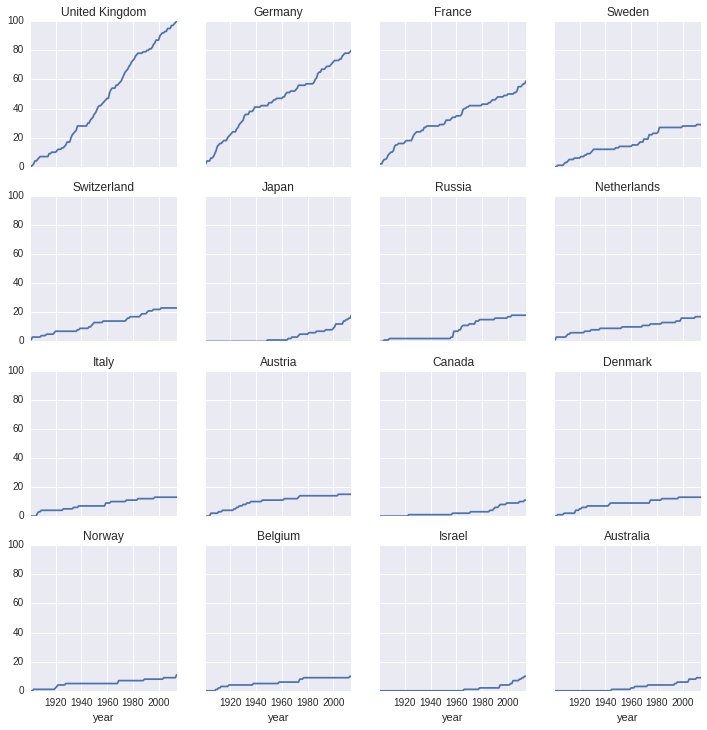

In [72]:
COL_NUM = 4 
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)
fig, axes = plt.subplots(COL_NUM, ROW_NUM,\
sharex=True, sharey=True,
figsize=(12,12))
for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[i/COL_NUM, i%ROW_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

In [73]:
import seaborn as sns

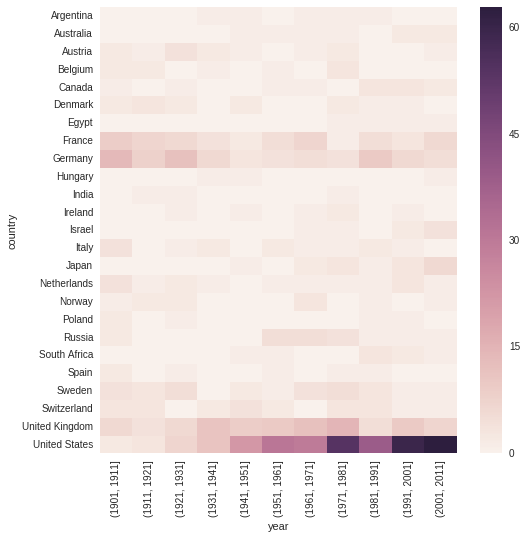

In [74]:
bins = np.arange(df.year.min(), df.year.max(), 10)
by_year_nat_binned = df.groupby(
['country', pd.cut(df.year, bins, precision=0)]).size().unstack().fillna(0)
plt.figure(figsize=(8,8))
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2])

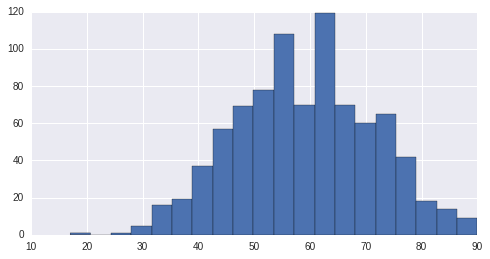

In [84]:
df['award_age'].hist(bins=20)

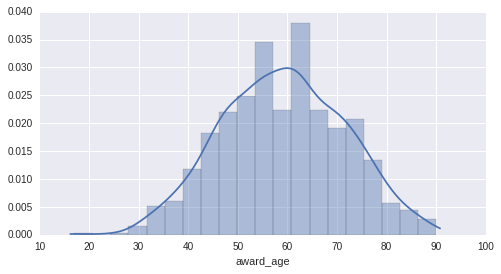

In [86]:
sns.distplot(df['award_age'])

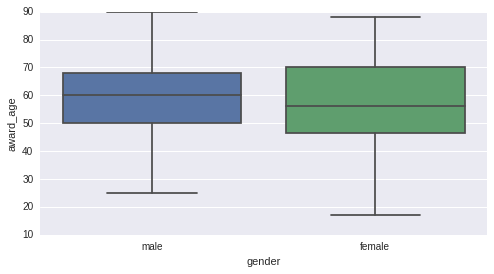

In [87]:
sns.boxplot(df.gender, df.award_age)

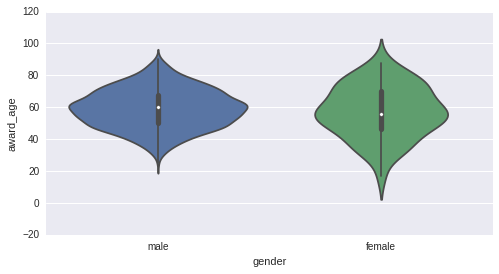

In [88]:
sns.violinplot(df.gender, df.award_age)

In [92]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth)\
.dt.days/365

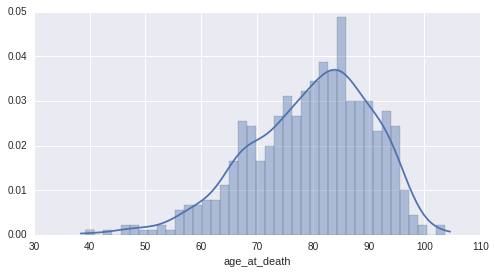

In [93]:
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

In [44]:
df[df.age_at_death > 100][['name', 'category', 'year']]

                     name                category  year
101          Ronald Coase               Economics  1991
329  Rita Levi-Montalcini  Physiology or Medicine  1986

In [45]:
df_temp = df[df.age_at_death.notnull()]

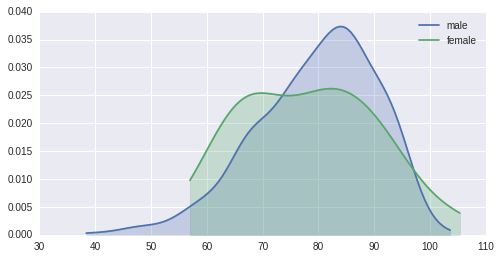

In [46]:
sns.kdeplot(df_temp[(df_temp.gender == 'male')].age_at_death, shade=True, label='male')
sns.kdeplot(df_temp[(df_temp.gender == 'female')].age_at_death, shade=True, label='female')
plt.legend()

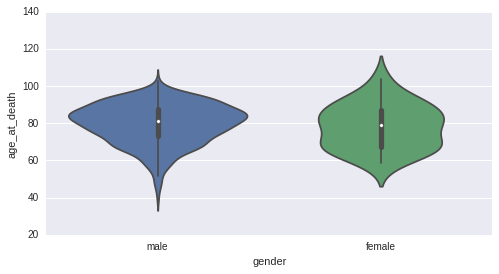

In [98]:
sns.violinplot(df.gender, age_at_death)

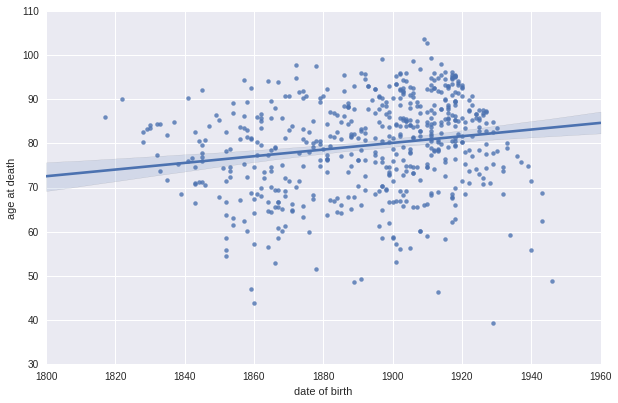

In [48]:
df_temp=df[df.age_at_death.notnull()]
data = pd.DataFrame(
{'age at death':df_temp.age_at_death,
'date of birth':df_temp.date_of_birth.dt.year})
sns.lmplot('date of birth', 'age at death', data, size=6, aspect=1.5)

In [49]:
df = pd.read_json('data/nobel_winners_plus_bornin.json', orient='records')

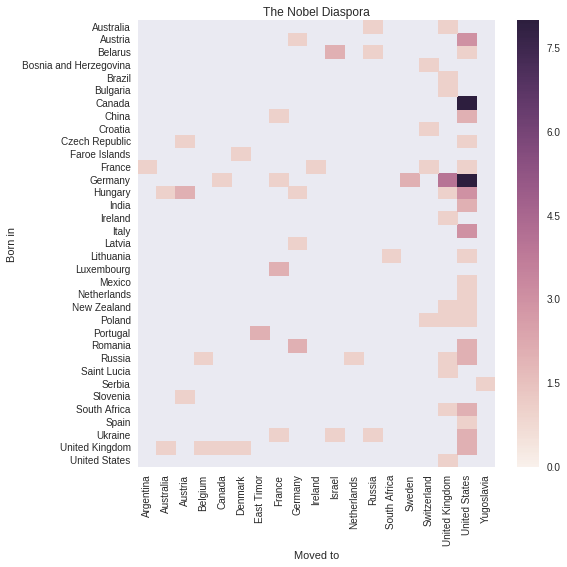

In [50]:
by_bornin_nat = df[df.born_in.notnull()].groupby(\
['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(8,8))
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8)
ax.set_title('The Nobel Diaspora')

In [51]:
df.date_of_birth = pd.to_datetime(df.date_of_birth).dt.date

In [52]:
df[(df.born_in == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category']]

                  name date_of_birth                category
119  Ernst Boris Chain    1906-06-19  Physiology or Medicine
484   Hans Adolf Krebs    1900-08-25  Physiology or Medicine
486           Max Born    1882-12-11                 Physics
503       Bernard Katz    1911-03-26  Physiology or Medicine